# 順伝播計算

まずは，文字の定義をします．  
入力層，中間層，出力層の各ユニットのインデックスをそれぞれ $i,j,k$で表します．  
また，時刻 $t$における入力，中間層の入出力，出力層の入出力，教師を以下のように表します．

入力： $x^t=(x^t_i)$  
中間層の入出力： $u^t=(u^t_j)，z^t=(z^t_j)$  
出力層の入出力： $v^t=(v^t_k)，y^t=(y_k^t)$   
教師： $d^t=(d^t_k)$   
さらに，入力 - 中間層間の重み，中間 - 中間層の帰還路の重み，中間 - 出力層間の重みを以下のように表します．

入力 - 中間層間の重み： $W^{(in)}=(w^{(in)}_{ji})$  
中間 - 中間層の帰還路の重み： $W=(w_{jj`})$  
中間 - 出力層間の重み： $W^{(out)}=(w^{(out)}_{kj})$  
上記の定義を含めたネットワークの構造を下図に示します．

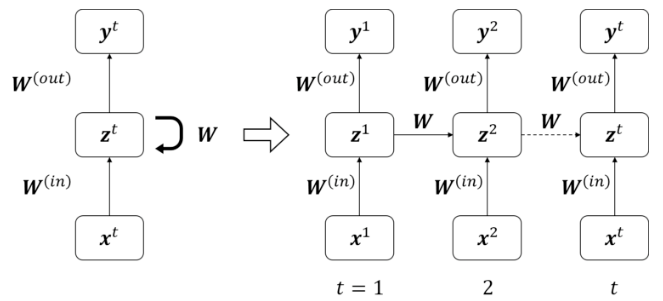

順伝播の計算について説明します．
中間層のユニット $j$ の入出力 $u^t_j$ および $z^t_j$ は，入力 $x_t$および一つ前の時刻での中間層の値 $z^{t−1}$を用いて以下のように表せます．
fは，活性化関数です．
$$
{\begin{align}
& u_j^t = \sum_i w_{ji}^{(in)}x_i^t + \sum_{j'} w_{jj'}z_{j'}^{t-1} \tag{1} \\
& z_j^t = f(u_j^t) \tag{2}
\end{align}
}
$$

ただし，$t=1$のとき，それまでの入力は存在しないため，$z_0=0$とします．
式(1), (2)をまとめ，行列表現すると中間層の出力 $z_t$ は以下のようになります

$$
{\boldsymbol z^t = \boldsymbol f(\boldsymbol W^{(in)}\boldsymbol x^t + \boldsymbol W \boldsymbol z^{t-1}) \tag{3}
}
$$
出力層のユニット $k$ の入出力 $v^t_k$ および $y^t_k$ は，中間層の出力 $z^t$を用いて以下のように表せます．

$$
{\begin{align}
& v_k^t = \sum_j w_{kj}^{(out)}z_j^t \tag{4} \\
& y_k^t = f^{(out)}(v_k^t) \tag{5}
\end{align}
}
$$
上記をまとめると出力は
$$
{\boldsymbol y^t = \boldsymbol f^{(out)}(\boldsymbol W^{(out)}\boldsymbol z^t) \tag{6}
}
$$

# 逆伝播計算

誤差逆伝播法により各層の各ユニットにおける誤差から勾配を計算します．  
今回 BPTT法(backpropagation through time) を説明します．  
BPTT法は，RNNを下図のように時間方向に展開し，誤差逆伝播の計算を行います．

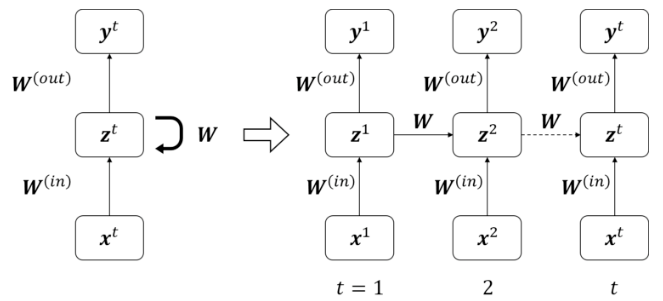


中間 - 出力層間における勾配
$$
{\begin{align}
\frac{\partial E}{\partial w_{kj}^{(out)}} &= \sum_{t=1}^T \frac{\partial E}{\partial v_k^t} \frac{\partial v_k^t}{\partial w_{kj}^{(out)}} \\
&= \sum_{t=1}^T \frac{\partial E}{\partial y_k^t} \frac{\partial y_k^t}{\partial v_k^t} \frac{\partial v_k^t}{\partial w_{kj}^{(out)}} \\
&= \sum_{t=1}^T \frac{\partial E}{\partial y_k^t} f^{(out)'}(v_k^t)z_j^t \\
&= \sum_{t=1}^T \delta_k^{(out), t} z_j^t \tag{7}
\end{align}
}
$$
中間 - 中間層の帰還路における勾配
$$
{\begin{align}
\frac{\partial E}{\partial w_{jj'}} &= \sum_{t=1}^T \frac{\partial E}{\partial u_j^t} \frac{\partial u_j^t}{\partial w_{jj'}} \\
&= \sum_{t=1}^T \biggl(\sum_{k'} \frac{\partial E}{\partial v_{k'}^t} \frac{\partial v_{k'}^t}{\partial z_j^t} \frac{\partial z_j^t}{\partial u_j^t} + \sum_{j''} \frac{\partial E}{\partial u_{j''}^{t+1}} \frac{\partial u_{j''}^{t+1}}{\partial z_j^t} \frac{\partial z_j^t}{\partial u_j^t} \biggr) \frac{\partial u_j^t}{\partial w_{jj'}} \\
&= \sum_{t=1}^T \biggl(\sum_{k'} \frac{\partial E}{\partial v_{k'}^t} \frac{\partial v_{k'}^t}{\partial z_j^t} + \sum_{j''} \frac{\partial E}{\partial u_{j''}^{t+1}} \frac{\partial u_{j''}^{t+1}}{\partial z_j^t} \biggr) \frac{\partial z_j^t}{\partial u_j^t} \frac{\partial u_j^t}{\partial w_{jj'}} \\
&= \sum_{t=1}^T \biggl(\sum_{k'} \delta_{k'}^{(out), t} w_{k'j} + \sum_{j''} \delta_{j''}^{t+1} w_{j''j}  \biggr) f'(u_j^t) z_j^{t-1} \\
&= \sum_{t=1}^T \delta_j^t z_j^{t-1} \tag{8}
\end{align}
}
$$
入力 - 中間層間における勾配
$$
{\begin{align}
\frac{\partial E}{\partial w_{ji}^{(in)}} &= \sum_{t=1}^T \frac{\partial E}{\partial u_j^t} \frac{\partial u_j^t}{\partial w_{ji}^{(in)}} \\
&= \sum_{t=1}^T \delta_j^t x_i^t \tag{9}
\end{align}
}
$$
中間 - 中間層の帰還路における勾配では，一つ先の時刻における中間層の誤差 $\delta^{t+1}$の項が存在します．
$t=Tt$の場合，$\delta^{T+1}=0$ とします．
$t=T,T−1,⋯,2,1$の順に誤差 $\delta$ を伝播させ，各時刻における勾配の総和をとります．
この勾配の総和を使って重みを更新します．

# 重みの更新

式(7), (8), (9)より，各層間における勾配が求められます．
この勾配を使って，以下の式より重みを更新します．
$$
{w_{new} = w_{old} - \varepsilon \frac{\partial E}{\partial w_{old}} \tag{10}
}
$$

In [2]:
from rnn import *
from matplotlib import pyplot

def save_loopfig(rnn, st, en, div, m, fn):
    n = int((en - st) / pi * div + 1)
    x = np.linspace(st, en, n)
    ys = rnn.predict_loop(np.sin(x[:m]), n - m)
    ys = np.array(ys)[:, 0]
    pyplot.figure(figsize = (12, 6))
    pyplot.plot(x[1:m], ys[1:m], '--o')
    pyplot.plot(x[m - 1:], ys[m - 1:], '--o')
    pyplot.savefig(fn)
    pyplot.clf()

if __name__ == '__main__':

    N = 7000
    pi = np.pi
    div = 6
    s = (np.random.rand(N) * pi).reshape(-1, 1)
    e = s + np.random.randint(2, 5, N).reshape(-1, 1) * pi / 2
    Xl = [np.linspace(_s, _e, (_e - _s) / pi * div + 1).reshape(-1, 1) for _s, _e in np.hstack((s, e))]
    Xl = map(lambda X: np.sin(X), Xl)

    rnn = RNN(1, 4, 1)
    rnn.train(Xl, epsilon = 0.05, lam = 0.001, epoch = 30)
    rnn.save_param()
    rnn.save_lossfig()

    st = np.random.rand() * pi
    en = st + 20 * pi
    save_loopfig(rnn, st, en, div, m = 7, fn = 'loop.png')

/home/naoya/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.


epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29


In [ ]:
rnn.train